## Demonstration of doing data analysis using Jupyter Notebooks
What is being presented:
* Python
* Jupyter notebooks
* Various python libraries
* Clustering of some patient features (eventually)

In [1]:
import pandas as pd
import pyodbc
import sys
import numpy as np

In [2]:
print('Python: ' + sys.version.split('|')[0])
print('Pandas: ' + pd.__version__)
print('pyODBC: ' + pyodbc.version)

Python: 3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.3
pyODBC: 4.0.30


## Connecting the Jupyter notebook to Elluminate Data Repository
### (There are better ways)
Here we are connecting to a database that is based on real customer data that has been *deidentified* 

We will be using the DM, AE and LB tables in the Clintek_010 study

In [3]:
conn = pyodbc.connect('DRIVER={SQL Server};Server=10.10.10.203;Database=sfls1_data;user=CDR_IIS_Account;password=eclinical.1;Trusted_Connection=false')
sql = 'select * from [Clintek_010].[DM]'
clintek10DMdf = pd.read_sql(sql, conn)

In [4]:
sql = 'select * from [Clintek_010].[AE]'
clintek10DMae = pd.read_sql(sql, conn)

## This part of the demo mostly stolen from [this paper](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3191-2019.pdf) by SAS/Novartis

In [5]:
clintek10DMdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STUDYID   359 non-null    object
 1   DOMAIN    359 non-null    object
 2   USUBJID   359 non-null    object
 3   SUBJID    359 non-null    object
 4   RFSTDTC   267 non-null    object
 5   RFENDTC   267 non-null    object
 6   RFXSTDTC  267 non-null    object
 7   RFXENDTC  267 non-null    object
 8   RFICDTC   359 non-null    object
 9   RFPENDTC  359 non-null    object
 10  DTHDTC    193 non-null    object
 11  DTHFL     193 non-null    object
 12  SITEID    359 non-null    object
 13  BRTHDTC   359 non-null    object
 14  AGE       359 non-null    int64 
 15  AGEU      359 non-null    object
 16  SEX       359 non-null    object
 17  RACE      339 non-null    object
 18  ETHNIC    354 non-null    object
 19  ARMCD     359 non-null    object
 20  ARM       359 non-null    object
 21  ACTARMCD  359 no

In [6]:
clintek10DMae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   4322 non-null   object 
 1   DOMAIN    4322 non-null   object 
 2   USUBJID   4322 non-null   object 
 3   AESEQ     4322 non-null   int64  
 4   AEREFID   4322 non-null   object 
 5   AESPID    4322 non-null   object 
 6   AETERM    4322 non-null   object 
 7   AELLT     4322 non-null   object 
 8   AELLTCD   4322 non-null   int64  
 9   AEDECOD   4322 non-null   object 
 10  AEPTCD    4322 non-null   int64  
 11  AEHLT     4322 non-null   object 
 12  AEHLTCD   4322 non-null   int64  
 13  AEHLGT    4322 non-null   object 
 14  AEHLGTCD  4322 non-null   int64  
 15  AEBODSYS  4322 non-null   object 
 16  AEBDSYCD  4322 non-null   int64  
 17  AESOC     4322 non-null   object 
 18  AESOCCD   4322 non-null   int64  
 19  AESER     4322 non-null   object 
 20  AEACN     4322 non-null   obje

In [7]:
dfdm1 = clintek10DMdf[['USUBJID', 'ARM', 'SEX', 'AGE', 'RACE']]

wk = pd.merge(dfdm1, clintek10DMae, on="USUBJID", how='inner')

In [101]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#display(wk)
wk.head(10)

USUBJID       ARM SEX  AGE   RACE      STUDYID DOMAIN  AESEQ  \
0  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      1   
1  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      2   
2  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      3   
3  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      4   
4  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      5   
5  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      6   
6  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      7   
7  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      8   
8  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE      9   
9  CLINTEK-010-0473-009  COHORT 1   F   52  WHITE  CLINTEK-010     AE     10   

   AEREFID         AESPID                 AETERM                  AELLT  \
0  4867042  AE-1507789-36  ACUTE GASTROENTERITIS  Acute gastroenteritis   
1  5136563  AE-1507789-43                 ANEMIA                 Anemia   
2  5136564  AE-1507789-44                 ANEMIA                 Anemia   
3  5136567  AE-1507789-45                 ANEMIA                 Anemia   
4  5136577  AE-1507789-47                 ANEMIA                 Anemia   
5  3597334  AE-1507789-20               ANOREXIA               Anorexia   
6  3597335  AE-1507789-21               ASTHENIA               Asthenia   
7  4852490  AE-1507789-34              BONE PAIN              Bone pain   
8  4788633  AE-1507789-26          BREAST CANCER          Breast cancer   
9  4756224  AE-1507789-25               CEPHALEA               Headache   

    AELLTCD             AEDECOD    AEPTCD  \
0  10066762     Gastroenteritis  10017888   
1  10002272             Anaemia  10002034   
2  10002272             Anaemia  10002034   
3  10002272             Anaemia  10002034   
4  10002272             Anaemia  10002034   
5  10002646  Decreased appetite  10061428   
6  10003549            Asthenia  10003549   
7  10006002           Bone pain  10006002   
8  10006187       Breast cancer  10006187   
9  10019211            Headache  10019211   

                                       AEHLT   AEHLTCD  \
0  Abdominal and gastrointestinal infections  10017967   
1                               Anaemias NEC  10002067   
2                               Anaemias NEC  10002067   
3                               Anaemias NEC  10002067   
4                               Anaemias NEC  10002067   
5                         Appetite disorders  10003022   
6                        Asthenic conditions  10003550   
7            Bone related signs and symptoms  10006006   
8      Breast and nipple neoplasms malignant  10006290   
9                              Headaches NEC  10019233   

                                              AEHLGT  AEHLGTCD  \
0                  Infections - pathogen unspecified  10021879   
1       Anaemias nonhaemolytic and marrow depression  10002086   
2       Anaemias nonhaemolytic and marrow depression  10002086   
3       Anaemias nonhaemolytic and marrow depression  10002086   
4       Anaemias nonhaemolytic and marrow depression  10002086   
5         Appetite and general nutritional disorders  10003018   
6                       General system disorders NEC  10018073   
7     Bone disorders (excl congenital and fractures)  10005959   
8  Breast neoplasms malignant and unspecified (in...  10006291   
9                                          Headaches  10019231   

                                            AEBODSYS  AEBDSYCD  \
0                        Infections and infestations  10021881   
1               Blood and lymphatic system disorders  10005329   
2               Blood and lymphatic system disorders  10005329   
3               Blood and lymphatic system disorders  10005329   
4               Blood and lymphatic system disorders  10005329   
5                 Metabolism and nutrition disorder

In [9]:
wk1 = pd.pivot_table(wk, values='USUBJID', index=['AEBODSYS', 'AEDECOD'], columns=['ARM'], aggfunc=lambda x:x.nunique())
#display(wk1)
wk1.head(20)

ARM                                                              COHORT 1  \
AEBODSYS                             AEDECOD                                
Blood and lymphatic system disorders Anaemia                         40.0   
                                     Cytopenia                        1.0   
                                     Febrile neutropenia              4.0   
                                     Haemolytic anaemia               NaN   
                                     Leukopenia                       7.0   
                                     Lymph node pain                  NaN   
                                     Lymphadenopathy                  1.0   
                                     Lymphocytosis                    NaN   
                                     Lymphopenia                      4.0   
                                     Neutropenia                     32.0   
                                     Pancytopenia                     4.0   
                                     Splenic infarction               NaN   
                                     Thrombocytopenia                64.0   
Cardiac disorders                    Acute coronary syndrome          1.0   
                                     Angina pectoris                  2.0   
                                     Atrial fibrillation              3.0   
                                     Atrial flutter                   NaN   
                                     Cardiac disorder                 NaN   
                                     Cardiac failure                  4.0   
                                     Cardiac failure congestive       NaN   

ARM                                                              COHORT 2  \
AEBODSYS                             AEDECOD                                
Blood and lymphatic system disorders Anaemia                         70.0   
                                     Cytopenia                        NaN   
                                     Febrile neutropenia              8.0   
                                     Haemolytic anaemia               NaN   
                                     Leukopenia                      13.0   
                                     Lymph node pain                  1.0   
                                     Lymphadenopathy                  2.0   
                                     Lymphocytosis                    1.0   
                                     Lymphopenia                      9.0   
                                     Neutropenia                     52.0   
                                     Pancytopenia                     1.0   
                                     Splenic infarction               1.0   
                                     Thrombocytopenia                97.0   
Cardiac disorders                    Acute coronary syndrome          1.0   
                                     Angina pectoris                  NaN   
                                     Atrial fibrillation              3.0   
                                     Atrial flutter                   NaN   
                                     Cardiac disorder                 1.0   
                                     Cardiac failure                  3.0   
                                     Cardiac failure congestive       3.0   

ARM                                                              SCREEN FAILURE  
AEBODSYS                             AEDECOD                                     
Blood and lymphatic system disorders Anaemia                                NaN  
                                     Cytopenia                              NaN  
                                     Febrile neutropenia                    NaN  
                                     Haemolytic anaemia                     1.0  
                                     Leukopenia                             NaN  
                                    

In [10]:
wk2 = wk1.reset_index()
wk2.head(5)

ARM                              AEBODSYS              AEDECOD  COHORT 1  \
0    Blood and lymphatic system disorders              Anaemia      40.0   
1    Blood and lymphatic system disorders            Cytopenia       1.0   
2    Blood and lymphatic system disorders  Febrile neutropenia       4.0   
3    Blood and lymphatic system disorders   Haemolytic anaemia       NaN   
4    Blood and lymphatic system disorders           Leukopenia       7.0   

ARM  COHORT 2  SCREEN FAILURE  
0        70.0             NaN  
1         NaN             NaN  
2         8.0             NaN  
3         NaN             1.0  
4        13.0             NaN

In [11]:
wk3=wk2.sort_values(by=['AEBODSYS', 'COHORT 1'], ascending=[True, False])

In [12]:
wk4= wk3.set_index(['AEBODSYS','AEDECOD'])
wk4.head(20)

ARM                                                           COHORT 1  \
AEBODSYS                             AEDECOD                             
Blood and lymphatic system disorders Thrombocytopenia             64.0   
                                     Anaemia                      40.0   
                                     Neutropenia                  32.0   
                                     Leukopenia                    7.0   
                                     Febrile neutropenia           4.0   
                                     Lymphopenia                   4.0   
                                     Pancytopenia                  4.0   
                                     Cytopenia                     1.0   
                                     Lymphadenopathy               1.0   
                                     Haemolytic anaemia            NaN   
                                     Lymph node pain               NaN   
                                     Lymphocytosis                 NaN   
                                     Splenic infarction            NaN   
Cardiac disorders                    Tachycardia                   5.0   
                                     Cardiac failure               4.0   
                                     Atrial fibrillation           3.0   
                                     Angina pectoris               2.0   
                                     Sinus tachycardia             2.0   
                                     Acute coronary syndrome       1.0   
                                     Myocardial infarction         1.0   

ARM                                                           COHORT 2  \
AEBODSYS                             AEDECOD                             
Blood and lymphatic system disorders Thrombocytopenia             97.0   
                                     Anaemia                      70.0   
                                     Neutropenia                  52.0   
                                     Leukopenia                   13.0   
                                     Febrile neutropenia           8.0   
                                     Lymphopenia                   9.0   
                                     Pancytopenia                  1.0   
                                     Cytopenia                     NaN   
                                     Lymphadenopathy               2.0   
                                     Haemolytic anaemia            NaN   
                                     Lymph node pain               1.0   
                                     Lymphocytosis                 1.0   
                                     Splenic infarction            1.0   
Cardiac disorders                    Tachycardia                   3.0   
                                     Cardiac failure               3.0   
                                     Atrial fibrillation           3.0   
                                     Angina pectoris               NaN   
                                     Sinus tachycardia             7.0   
                                     Acute coronary syndrome       1.0   
                                     Myocardial infarction         NaN   

ARM                                                           SCREEN FAILURE  
AEBODSYS                             AEDECOD                                  
Blood and lymphatic system disorders Thrombocytopenia                    NaN  
                                     Anaemia                             NaN  
                                     Neutropenia                         NaN  
                                     Leukopenia                          NaN  
                                     Febrile neutropenia                 NaN  
                                     Lymphopenia                         NaN  
                                     Pancytopenia                        NaN  
                               

In [13]:
wk4[~wk4['SCREEN FAILURE'].isnull()]

ARM                                                                                       COHORT 1  \
AEBODSYS                                           AEDECOD                                           
Blood and lymphatic system disorders               Haemolytic anaemia                          NaN   
Cardiac disorders                                  Atrial flutter                              NaN   
Gastrointestinal disorders                         Abdominal pain                             18.0   
                                                   Duodenal obstruction                        NaN   
General disorders and administration site condi... Asthenia                                   24.0   
                                                   Pyrexia                                    18.0   
                                                   General physical health deterioration       3.0   
                                                   Chest pain                                  1.0   
                                                   Sudden death                                NaN   
Infections and infestations                        Bronchopulmonary aspergillosis              1.0   
                                                   Septic shock                                1.0   
                                                   Pulmonary tuberculosis                      NaN   
Metabolism and nutrition disorders                 Hypercalcaemia                              4.0   
Respiratory, thoracic and mediastinal disorders    Dyspnoea                                   15.0   
                                                   Cough                                      13.0   

ARM                                                                                       COHORT 2  \
AEBODSYS                                           AEDECOD                                           
Blood and lymphatic system disorders               Haemolytic anaemia                          NaN   
Cardiac disorders                                  Atrial flutter                              NaN   
Gastrointestinal disorders                         Abdominal pain                             11.0   
                                                   Duodenal obstruction                        NaN   
General disorders and administration site condi... Asthenia                                   33.0   
                                                   Pyrexia                                    34.0   
                                                   General physical health deterioration       6.0   
                                                   Chest pain                                  3.0   
                                                   Sudden death                                NaN   
Infections and infestations                        Bronchopulmonary aspergillosis              NaN   
                                                   Septic shock                                7.0   
                                                   Pulmonary tuberculosis                      NaN   
Metabolism and nutrition disorders                 Hypercalcaemia                              1.0   
Respiratory, thoracic and mediastinal disorders    Dyspnoea                                   19.0   
                                                   Cough                                      28.0   

ARM                                                                                       SCREEN FAILURE  
AEBODSYS                                           AEDECOD                                                
Blood and lymphatic system disorders               Haemolytic anaemia                                1.0  
Cardiac disorders                                  Atrial flutter                                    1.0  
Gastrointestinal disorders                         Abdominal pain                                    1

In [27]:
wk4[wk4['COHORT 2'] > 20]

ARM                                                                    COHORT 1  \
AEBODSYS                                           AEDECOD                        
Blood and lymphatic system disorders               Thrombocytopenia        64.0   
                                                   Anaemia                 40.0   
                                                   Neutropenia             32.0   
Gastrointestinal disorders                         Nausea                  58.0   
                                                   Diarrhoea               33.0   
                                                   Vomiting                33.0   
                                                   Constipation            31.0   
General disorders and administration site condi... Fatigue                 50.0   
                                                   Asthenia                24.0   
                                                   Pyrexia                 18.0   
Investigations                                     Weight decreased        38.0   
Metabolism and nutrition disorders                 Decreased appetite      52.0   
                                                   Hyponatraemia           15.0   
Nervous system disorders                           Dizziness               13.0   
Respiratory, thoracic and mediastinal disorders    Cough                   13.0   
Vascular disorders                                 Hypotension              5.0   

ARM                                                                    COHORT 2  \
AEBODSYS                                           AEDECOD                        
Blood and lymphatic system disorders               Thrombocytopenia        97.0   
                                                   Anaemia                 70.0   
                                                   Neutropenia             52.0   
Gastrointestinal disorders                         Nausea                 101.0   
                                                   Diarrhoea               56.0   
                                                   Vomiting                50.0   
                                                   Constipation            53.0   
General disorders and administration site condi... Fatigue                 79.0   
                                                   Asthenia                33.0   
                                                   Pyrexia                 34.0   
Investigations                                     Weight decreased        55.0   
Metabolism and nutrition disorders                 Decreased appetite      58.0   
                                                   Hyponatraemia           21.0   
Nervous system disorders                           Dizziness               23.0   
Respiratory, thoracic and mediastinal disorders    Cough                   28.0   
Vascular disorders                                 Hypotension             21.0   

ARM                                                                    SCREEN FAILURE  
AEBODSYS                                           AEDECOD                             
Blood and lymphatic system disorders               Thrombocytopenia               NaN  
                                                   Anaemia                        NaN  
                                                   Neutropenia                    NaN  
Gastrointestinal disorders                         Nausea                         NaN  
                                                   Diarrhoea                      NaN  
                                                   Vomiting                       NaN  
                                                   Constipation                   NaN  
General disorders and administration site condi... Fatigue                        NaN  
                                                   Asthenia                       1.0  
                                          

In [29]:
wk.describe()

AGE        AESEQ       AELLTCD        AEPTCD       AEHLTCD  \
count  4322.000000  4322.000000  4.322000e+03  4.322000e+03  4.322000e+03   
mean     65.385007    14.084914  1.002770e+07  1.002918e+07  1.002775e+07   
std      11.944380    14.170612  1.724268e+04  1.769544e+04  1.846816e+04   
min      18.000000     1.000000  1.000006e+07  1.000006e+07  1.000020e+07   
25%      59.000000     5.000000  1.001357e+07  1.001397e+07  1.001274e+07   
50%      67.000000    10.000000  1.002881e+07  1.002881e+07  1.002882e+07   
75%      74.000000    18.000000  1.004355e+07  1.004355e+07  1.004356e+07   
max      92.000000   104.000000  1.008092e+07  1.008249e+07  1.008221e+07   

           AEHLGTCD      AEBDSYCD       AESOCCD       AESTDY       AEENDY  
count  4.322000e+03  4.322000e+03  4.322000e+03  4259.000000  3153.000000  
mean   1.002543e+07  1.001930e+07  1.001930e+07    88.026532   114.908341  
std    1.666362e+04  1.083931e+04  1.083931e+04   150.061796   160.018065  
min    1.000048e+07  1.000533e+07  1.000533e+07   -21.000000   -14.000000  
25%    1.001798e+07  1.000533e+07  1.000533e+07    15.000000    28.000000  
50%    1.001807e+07  1.001806e+07  1.001806e+07    36.000000    57.000000  
75%    1.003553e+07  1.002743e+07  1.002743e+07    85.000000   128.000000  
max    1.008221e+07  1.007754e+07  1.007754e+07  1526.000000  1526.000000

In [31]:
#rslt1 = pd.pivot_table(wk, values='LBSTRESN', index=['LBTEST','VISIT'], columns=['ARM'], aggfunc='describe')

In [32]:
sql = 'select * from [Clintek_010].[LB]'
clintek10DMlb = pd.read_sql(sql, conn)

In [33]:
lk = pd.merge(dfdm1, clintek10DMlb, on='USUBJID', how='inner')

In [37]:
lk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149765 entries, 0 to 149764
Data columns (total 35 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   USUBJID   149765 non-null  object 
 1   ARM       149765 non-null  object 
 2   SEX       149765 non-null  object 
 3   AGE       149765 non-null  int64  
 4   RACE      135036 non-null  object 
 5   STUDYID   149765 non-null  object 
 6   DOMAIN    149765 non-null  object 
 7   LBSEQ     149765 non-null  int64  
 8   LBSPID    149765 non-null  object 
 9   LBTESTCD  149765 non-null  object 
 10  LBTEST    149765 non-null  object 
 11  LBCAT     149765 non-null  object 
 12  LBSCAT    2007 non-null    object 
 13  LBORRES   110990 non-null  object 
 14  LBORRESU  97057 non-null   object 
 15  LBORNRLO  100303 non-null  object 
 16  LBORNRHI  100303 non-null  object 
 17  LBSTRESC  109268 non-null  object 
 18  LBSTRESN  99386 non-null   float64
 19  LBSTRESU  85739 non-null   object 
 20  LBST

In [39]:
rslt1 = pd.pivot_table(lk, values='LBSTRESN', index=['LBTEST', 'VISIT'], columns=['ARM'], aggfunc='describe')

In [48]:
rslt1.describe()

25%                                      50%               \
ARM       COHORT 1     COHORT 2 SCREEN FAILURE     COHORT 1     COHORT 2   
count  5656.000000  7524.000000     116.000000  5656.000000  7524.000000   
mean     30.216070    32.320147      30.674421    32.229597    34.100681   
std      67.343458    71.741283      57.088649    72.370100    78.979840   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.317300     0.350544       0.599650     0.350700     0.384775   
50%       2.806250     2.682500       4.070800     3.050000     3.000000   
75%      28.300000    31.250000      31.400000    29.225000    32.500000   
max    1026.000000  1074.000000     316.000000  1026.000000  1826.000000   

                              75%                                    count  \
ARM   SCREEN FAILURE     COHORT 1     COHORT 2 SCREEN FAILURE     COHORT 1   
count     116.000000  5656.000000  7524.000000     116.000000  7132.000000   
mean       31.815621    34.788367    36.585750      34.136457     4.654936   
std        57.936151    80.666268    93.457779      62.115572    12.045954   
min         0.000000     0.000000     0.000000       0.000000     0.000000   
25%         0.689750     0.446725     0.450900       0.877500     1.000000   
50%         4.300000     3.420000     3.300000       4.750000     1.000000   
75%        32.700000    30.000000    33.370581      33.437500     3.000000   
max       316.000000  1026.000000  2578.000000     341.000000   114.000000   

                                           max                                \
ARM       COHORT 2 SCREEN FAILURE     COHORT 1       COHORT 2 SCREEN FAILURE   
count  9776.000000     156.000000  5656.000000    7524.000000     116.000000   
mean      6.726575       2.743590    44.128686     124.140664      45.561822   
std      20.938800       3.276252   130.310371    3518.915110     113.230532   
min       0.000000       0.000000     0.000000       0.000000       0.000000   
25%       1.000000       0.000000     0.600000       0.580750       1.198225   
50%       1.000000       1.000000     4.100000       3.900000       4.838150   
75%       3.000000       5.250000    33.500000      37.100000      37.475725   
max     208.000000      11.000000  3480.000000  212000.000000    1022.000000   

              mean                                       min               \
ARM       COHORT 1      COHORT 2 SCREEN FAILURE     COHORT 1     COHORT 2   
count  5656.000000   7524.000000     116.000000  5656.000000  7524.000000   
mean     33.271598     39.467934      33.628566    27.425838    28.495618   
std      73.605256    236.821693      59.970792    64.900868    65.003856   
min       0.000000      0.000000       0.000000     0.000000     0.000000   
25%       0.405712      0.421173       0.771167     0.267200     0.278750   
50%       3.244400      3.141129       4.687250     2.130000     2.000000   
75%      30.436063     33.500000      33.500000    22.100000    26.700000   
max    1026.000000  14531.692308     319.285714  1026.000000  1020.000000   

                              std                               
ARM   SCREEN FAILURE     COHORT 1      COHORT 2 SCREEN FAILURE  
count     116.000000  3531.000000   4261.000000      52.000000  
mean       28.315149    11.863688     44.121442      14.321534  
std        55.934785    66.117734   1160.255888      55.049573  
min         0.000000     0.000000      0.000000       0.000000  
25%         0.398100     0.116709      0.118794       0.177487  
50%         3.094000     0.704811      0.845790       1.019124  
75%        26.094250     3.675593      4.293803       5.308729  
max       316.000000   727.602271  52120.749071     385.896939

# Before developing patient features to cluster on. Go to the K-Means Demo

In [51]:
conn = pyodbc.connect('DRIVER={SQL Server};Server=10.10.10.203;Database=sfls1_data;user=CDR_IIS_Account;password=eclinical.1;Trusted_Connection=false')
sql = 'select * from [Clintek_010].[VS]'
clintek10VS = pd.read_sql(sql, conn)

In [54]:
clintek10VS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21524 entries, 0 to 21523
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   21524 non-null  object 
 1   DOMAIN    21524 non-null  object 
 2   USUBJID   21524 non-null  object 
 3   VSSEQ     21524 non-null  int64  
 4   VSSPID    21524 non-null  object 
 5   VSTESTCD  21524 non-null  object 
 6   VSTEST    21524 non-null  object 
 7   VSORRES   21341 non-null  object 
 8   VSORRESU  21341 non-null  object 
 9   VSSTRESC  21341 non-null  object 
 10  VSSTRESN  21341 non-null  float64
 11  VSSTRESU  21341 non-null  object 
 12  VSSTAT    183 non-null    object 
 13  VSMETHOD  20890 non-null  object 
 14  VSBLFL    2320 non-null   object 
 15  VSDRVFL   2879 non-null   object 
 16  VISITNUM  21524 non-null  float64
 17  VISIT     21524 non-null  object 
 18  EPOCH     21324 non-null  object 
 19  VSDTC     21343 non-null  object 
 20  VSDY      21256 non-null  fl

In [71]:
patientweight = clintek10VS[clintek10VS.VSTESTCD.eq('WEIGHT') & clintek10VS.EPOCH.eq('SCREENING') ]
patientheight = clintek10VS[clintek10VS.VSTESTCD.eq('HEIGHT') & clintek10VS.EPOCH.eq('SCREENING')]

In [75]:
pw1 = patientweight[['USUBJID', 'VSORRES']]
pw1.columns = ['USUBJID', 'INITIALWEIGH']
ph1 = patientheight[['USUBJID', 'VSORRES']]
ph1.columns = ['USUBJID', 'INITIALHEIGHT']

In [76]:
bmicalc = pd.merge(pw1, ph1, on='USUBJID')

In [81]:
bmicalc.describe()

USUBJID INITIALWEIGH INITIALHEIGHT
count                    270          270           270
unique                   262          169            73
top     CLINTEK-010-0686-001           63           178
freq                       2            7            17

## Oops I might have made a mistake above
Imagine if I were a Data Manager running a carefully scripted notebook with similar datachecks along the way...

But I digress\
Pressing on unbounded by data accuracy

In [85]:
bmicalc['BMI'] = bmicalc.INITIALWEIGH.astype('float64') / ((bmicalc.INITIALHEIGHT.astype('float64')/100)**2)

In [87]:
dfdmplusbmi = pd.merge(dfdm1, bmicalc, on='USUBJID')

In [90]:
df4plot = pd.DataFrame(dfdmplusbmi, columns=['AGE', 'BMI'])

In [99]:
df4plot.describe()

AGE         BMI
count  270.000000  270.000000
mean    64.862963   26.479228
std     13.117418    5.185409
min     18.000000   17.102915
25%     57.250000   22.718974
50%     67.000000   26.172073
75%     74.000000   29.049150
max     92.000000   48.289124

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

[[43.3877551  26.90399922]
 [62.45192308 26.78672447]
 [76.         26.02800258]]


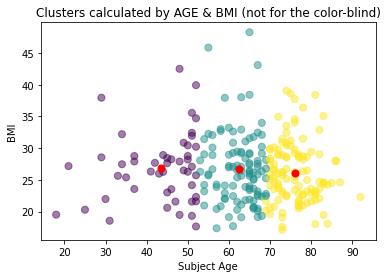

In [97]:
kmeans = KMeans(n_clusters=3).fit(df4plot)
centroids = kmeans.cluster_centers_
print(centroids)
plt.xlabel('Subject Age')
plt.ylabel('BMI')
plt.title('Clusters calculated by AGE & BMI (not for the color-blind)')
plt.scatter(df4plot['AGE'], df4plot['BMI'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# IF you do not like the clustering presented fro the K-Means algorithm
[This](https://machinelearningmastery.com/clustering-algorithms-with-python/) paper compares 10 clustering algorithms that one can work with that are available from the sklearn library.

There are other libraries.

# What was learned

* I usually suck at demo's. I like the Jupyter Notebook format
* There is a *LOT* more to be presented
* There is more than a few clustering algorithms that can be explored to cluster data
* I might not even get to the PATIENT-SITE demo that I thought was kind of interesting